In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('datasets/weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.shape

(10000, 3)

In [6]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

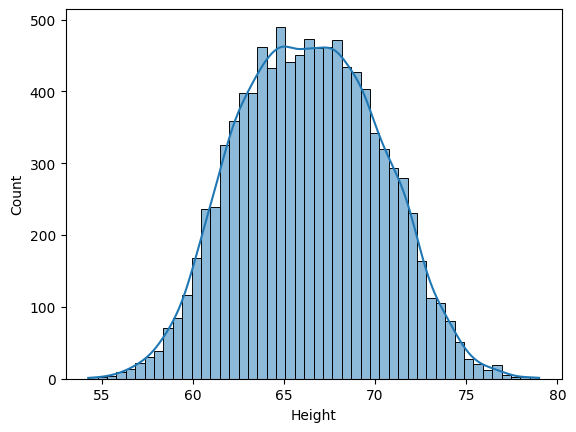

In [7]:
sns.histplot(df['Height'], kde=True);

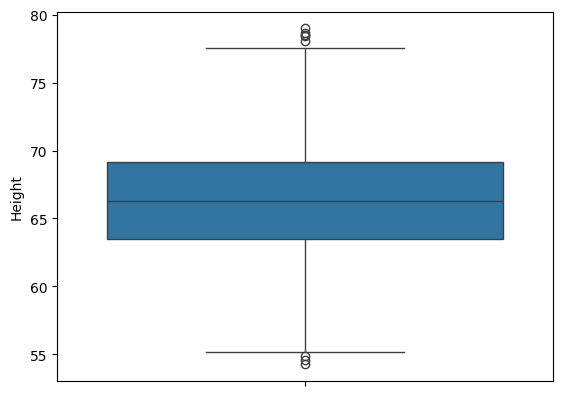

In [8]:
sns.boxplot(df['Height']);

### Trimming

In [11]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

In [10]:
upper_limit

74.7857900583366

In [12]:
lower_limit

58.13441158671655

In [13]:
df[(df['Height'] >= 74.78) | (df['Height'] <= 58.13)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [16]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [17]:
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

In [18]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

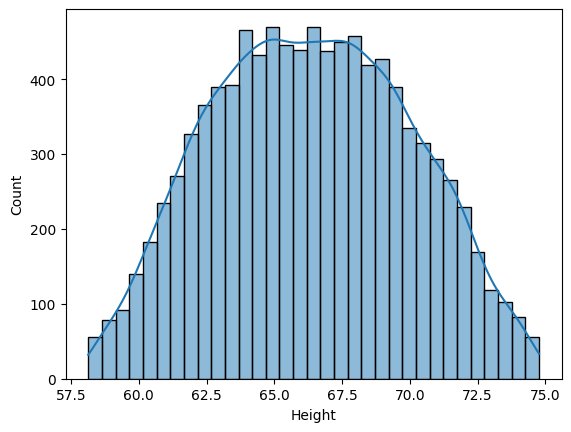

In [19]:
sns.histplot(new_df['Height'], kde=True);

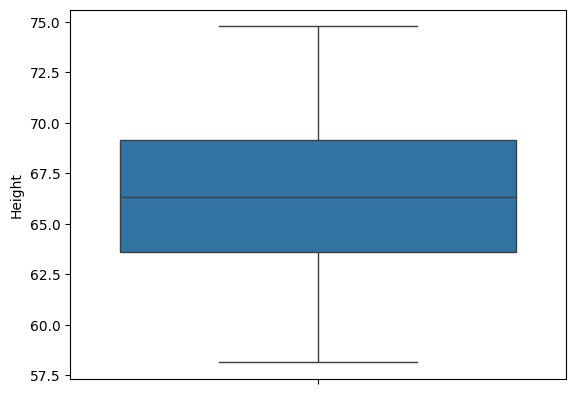

In [20]:
sns.boxplot(new_df['Height']);

### Capping

In [21]:
# Capping --> Winsorization
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

In [22]:
df.shape

(10000, 3)

In [23]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

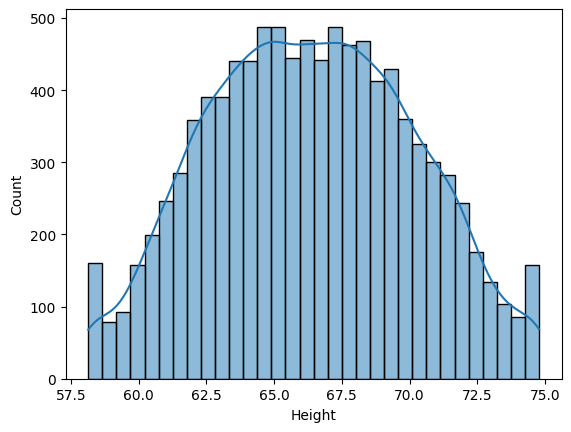

In [24]:
sns.histplot(df['Height'], kde=True);

<Axes: ylabel='Height'>

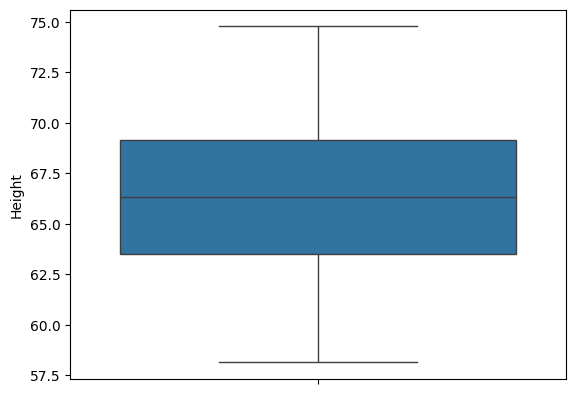

In [25]:
sns.boxplot(df['Height'])